In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json


import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

In [15]:
def build_features(path,feature_type="mfcc"):

    feature_list = []
    meta_list = []
    with open(path) as in_hanlder:
        for each_line in in_hanlder:
            line_obj = json.loads(each_line)
            if feature_type == "mfcc":
                if line_obj["mfcc_feature"]:
                    meta_list.append([line_obj["teacher_id"], line_obj["classroom"]])
                    feature_list.append(line_obj["mfcc_feature"])
            elif feature_type == "d_mfcc":
                if line_obj["d_mfcc_feature"]:
                    meta_list.append([line_obj["teacher_id"], line_obj["classroom"]])
                    feature_list.append(line_obj["d_mfcc_feature"])
            elif feature_type == "combine":
                if line_obj["mfcc_feature"] and line_obj["d_mfcc_feature"]:
                    meta_list.append([line_obj["teacher_id"], line_obj["classroom"]])
                    feature_list.append(line_obj["mfcc_feature"].extend(line_obj["d_mfcc_feature"]))
    return meta_list,np.array(feature_list)

In [41]:
def dis_euclidean(x1,x2):
    dis = np.sqrt(np.sum(np.square(x1 - x2)))
    return  dis
def eu_clustering(data,n):
    ret = None
    estimator = KMeans(n_clusters=n)
    estimator.fit(data)
    label_pred = estimator.labels_
    centroids = estimator.cluster_centers_
    inertia = estimator.inertia_
    print("centroids",centroids)
    print("inertia",inertia)
    #print("label_pred",label_pred)
    return label_pred,centroids
def run_cluster(n):
    feature_path = "/Users/zhangchunyu/PycharmProjects/class_content_analysis/data/clustering/features2"
    # data_process(feature_path)
    meta_list, feature_array = build_features(feature_path)
    print(len(meta_list), feature_array.shape)
    label_pre, centroids = eu_clustering(feature_array,n)

    for i in range(0, len(meta_list)):
        # print("\t".join(meta_list[i])+"\t"+str(label_pre[i]))
        meta_list[i].append(str(label_pre[i]))
        for each_center in centroids:
            dis_tmp = dis_euclidean(each_center, feature_array[i])
            #print(type(dis_tmp))
            meta_list[i].append(dis_tmp.astype(float))
        if meta_list[i][0] in ["2442486","6144080","6702906","6783222","7223604","8922720","11614890","13626540"]:
            #["6144080"]:  #
            tmp_list = []
            for each_item in meta_list[i]:
                tmp_list.append(str(each_item))
            print("\t".join(tmp_list))
        # if label_pre[i] == 2:
        #    bad_count += 1

    column_list = ["teacher_id","classroom","label"]
    for i in range(0,len(centroids)):
        column_list.append("dis_center_"+str(i))
    ret_df = pd.DataFrame(meta_list,columns=column_list)
    print(ret_df.groupby('label').count())
    return ret_df

In [42]:
clustering_ret = run_cluster(3)

2487 (2487, 13)
centroids [[ 16.22555791   2.01237611 -16.55649977   1.32747931 -19.68781665
  -11.28141233  -8.07730849  -6.51838155  -1.22657455  -6.15831695
   -4.93581255  -3.71050321  -3.1536649 ]
 [ 17.1657026  -11.17859492 -19.18007624   8.13331161 -21.85972331
   -2.89278242  -9.87979946  -2.01003985  -2.29467756  -4.66564484
   -3.49424561  -4.67064915  -0.47935761]
 [ 16.91178389  -6.70320183 -13.32765301   0.84107029 -17.18857582
   -5.47080318 -12.95635335  -0.95964346  -6.90969063  -2.36439907
   -6.863281    -2.98419784  -2.98612246]]
inertia 619772.0559630713
2442486	jzb765c4d9f78343ffbc028eb32f444005	0	14.684597459183651	27.303738625657846	20.296840818672752
6702906	jz66f369e8728a47e7b72b5184ffb63684	1	20.8145023089524	8.038080071254738	14.553123260414003
6783222	jz54fa649ca9084a5882bfbbdcb8500562	0	13.782585488612744	24.88804246082879	20.423591863458398
7223604	jza8cfa15deb874df0bb14036fc0bc45cc	0	17.98298507541925	28.76843916576606	28.211513860105804
8922720	jzbf86993

(2487, 6) teacher_id       object
classroom        object
label            object
dis_center_0    float64
dis_center_1    float64
dis_center_2    float64
dtype: object
count    2487.000000
mean       19.796290
std         6.517736
min         5.943651
25%        15.107946
50%        19.063009
75%        23.565302
max        53.225397
Name: dis_center_0, dtype: float64
count    2487.000000
mean       19.688621
std         6.663580
min         4.555219
25%        14.635423
50%        19.015839
75%        24.115823
max        44.007217
Name: dis_center_1, dtype: float64
count    2487.000000
mean       18.988014
std         5.820891
min         6.224357
25%        14.740207
50%        18.283779
75%        22.545620
max        45.729359
Name: dis_center_2, dtype: float64


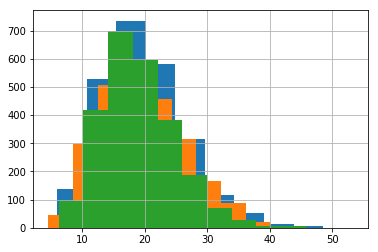

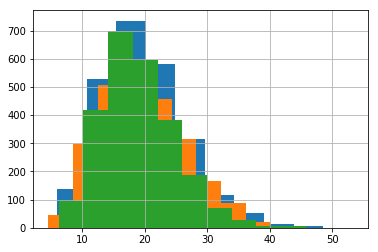

In [51]:
print(clustering_ret.shape,clustering_ret.dtypes)
print(clustering_ret["dis_center_0"].describe())
clustering_ret["dis_center_0"].hist(bins=10)
print(clustering_ret["dis_center_1"].describe())
clustering_ret["dis_center_1"].hist(bins=10)
print(clustering_ret["dis_center_2"].describe())
clustering_ret["dis_center_2"].hist(bins=10)

In [54]:
print(clustering_ret["dis_center_0"].quantile(.25))
print(clustering_ret["dis_center_1"].quantile(.25))
print(clustering_ret["dis_center_2"].quantile(.25))

15.107945606576191
14.635423079013625
14.74020651329616


In [61]:
c0_df = clustering_ret[clustering_ret.dis_center_0<15.1079]
c1_df = clustering_ret[clustering_ret.dis_center_1<14.6354]
c2_df = clustering_ret[clustering_ret.dis_center_2<14.7402]
print(c0_df.shape,c1_df.shape,c2_df.shape)
good_join_df=pd.merge(c1_df,c2_df,on="teacher_id")
print(good_join_df.shape)
good_join_df.head(50)

(622, 6) (622, 6) (622, 6)
(255, 11)


,teacher_id,classroom_x,label_x,dis_center_0_x,dis_center_1_x,dis_center_2_x,classroom_y,label_y,dis_center_0_y,dis_center_1_y,dis_center_2_y
0,1334100,jz59a5273a216b435084c2c0ded3be208e,1,22.535974,13.012594,14.107876,jz59a5273a216b435084c2c0ded3be208e,1,22.535974,13.012594,14.107876
1,1488948,jz856dd5a470bc4253bee55e014401aaf4,1,19.534247,9.967508,14.389040,jz856dd5a470bc4253bee55e014401aaf4,1,19.534247,9.967508,14.389040
2,1528638,jzae6b07874b3c4b02b493bb2f9588638c,1,14.512840,8.237916,13.676312,jzae6b07874b3c4b02b493bb2f9588638c,1,14.512840,8.237916,13.676312
3,1552620,jz445d0a75680c4182840a8c2ffa3efbb8,2,15.552306,13.405552,10.877293,jz445d0a75680c4182840a8c2ffa3efbb8,2,15.552306,13.405552,10.877293
4,1618092,jzb49e4f4446444b839a7cd6309eebca52,2,10.327603,13.960819,7.932873,jzb49e4f4446444b839a7cd6309eebca52,2,10.327603,13.960819,7.932873
5,1943910,jz65438cd1917042b390499be103a33577,2,15.018959,13.931171,11.395076,jz65438cd1917042b390499be103a33577,2,15.018959,13.931171,11.395076
6,2074260,jzee94d4ab43ad4f4e804c505fd36603a5,2,17.642700,13.828577,13.676557,jzee94d4ab43ad4f4e804c505fd36603a5,2,17.642700,13.828577,13.676557
7,2290704,jz128cd2da649943c390f1b6d58525c729,1,18.206977,11.871352,12.935546,jz128cd2da649943c390f1b6d58525c729,1,18.206977,11.871352,12.935546
8,2403360,jz44e4e15b11a544ba9b871307f9f1c6a0,1,19.129067,10.735858,11.300548,jz44e4e15b11a544ba9b871307f9f1c6a0,1,19.129067,10.735858,11.300548
9,2508552,jza1def069c604401fbd54cd7d2d662835,0,10.468110,14.221464,13.456587,jza1def069c604401fbd54cd7d2d662835,0,10.468110,14.221464,13.456587
